In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from simple_hierarchical_topic_model import SimpleHierarchicalTopicModel, load_vocab, loadmat

In [3]:
np.random.seed(1)

In [4]:
print("Loading data...")
data = loadmat("/Users/aleverentz/Code/anchor-word-recovery/M_nips.full_docs.mat.trunc.mat")["M"]
#data = loadmat("/Users/aleverentz/ucsd-research/hier-topic-models/data/abstracts.mat")["M"]
print("Vocab size: {}".format(data.shape[0]))
print("Num documents: {}".format(data.shape[1]))
print("Nonzero entries: {}".format(data.nnz))
print("Loading vocab...")
vocab = load_vocab("/Users/aleverentz/Code/anchor-word-recovery/vocab.nips.txt.trunc")
#vocab = load_vocab("/Users/aleverentz/ucsd-research/hier-topic-models/data/abstracts_vocab.txt")
print("Vocab size = {}".format(len(vocab)))
assert data.shape[0] == len(vocab)

Loading data...
Vocab size: 2940
Num documents: 1500
Nonzero entries: 585933
Loading vocab...
Vocab size = 2940


In [5]:
model = SimpleHierarchicalTopicModel(
    branching_factors = [5, 5], num_epochs = 100,
    batch_size = 100, vocab = vocab)

In [6]:
model.fit(data)
top_words = model.get_top_words_by_node(num_words = 10)
model.print_top_words_by_node(num_words = 10);

100%|██████████| 150000/150000 [1:18:55<00:00, 31.43it/s]

Top words by node:
()    : network, function, input, set, result, performance, case, probability, image, test
(0,)  : output, dynamic, system, size, parameter, component, direction, theory, distribution, training
(0, 0): neuron, hidden, fact, sum, output, environment, section, process, represent, firing
(0, 1): neuron, fact, adaptation, process, level, factor, pixel, peak, output, view
(0, 2): algorithm, linear, field, section, rules, step, activation, output, small, derived
(0, 3): algorithm, neuron, output, hidden, likelihood, predict, basic, training, loss, sum
(0, 4): visual, neuron, output, algorithm, view, sum, field, potential, sensor, multiple
(1,)  : neural, order, data, computation, error, recognition, system, prediction, form, unit
(1, 0): noise, method, equation, error, factor, data, channel, approach, algorithm, level
(1, 1): noise, method, hidden, factor, error, large, channel, algorithm, prior, sparse
(1, 2): equation, vector, method, error, pixel, neuron, noise, data, l

In [7]:
topic_vectors = model.get_expected_topic_vectors()

In [8]:
topic_vectors.shape

(31, 2940)

In [9]:
variance = topic_vectors.var(axis=0)
print(variance.shape)
np.linalg.norm(variance)

(2940,)


0.00066710219833474656

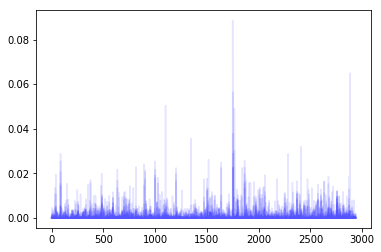

In [10]:
for i in range(10):
    plt.plot(topic_vectors[i,:], color='b', alpha=0.1);

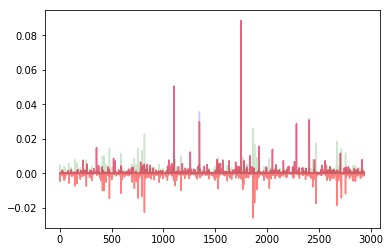

In [11]:
plt.plot(topic_vectors[0,:], color='b', alpha=0.2)
plt.plot(topic_vectors[1,:], color='g', alpha=0.2)
plt.plot(topic_vectors[0,:] - topic_vectors[1,:], color='r', alpha=0.5)
None

In [24]:
from importlib import reload
import simple_hierarchical_topic_model
reload(simple_hierarchical_topic_model)
from simple_hierarchical_topic_model import SimpleHierarchicalTopicModel, load_vocab, loadmat

In [25]:
SimpleHierarchicalTopicModel.print_top_words_by_node(model, num_words = 5);

Top words by node:
()    : network, function, input, set, result
(0,)  : output, dynamic, system, size, parameter
(1,)  : neural, order, data, computation, error
(2,)  : problem, weight, layer, neural, net
(3,)  : single, information, unit, space, task
(4,)  : neural, unit, system, data, distribution
(0, 0): neuron, hidden, fact, sum, output
(0, 1): neuron, fact, adaptation, process, level
(0, 2): algorithm, linear, field, section, rules
(0, 3): algorithm, neuron, output, hidden, likelihood
(0, 4): visual, neuron, output, algorithm, view
(1, 0): noise, method, equation, error, factor
(1, 1): noise, method, hidden, factor, error
(1, 2): equation, vector, method, error, pixel
(1, 3): hidden, error, approach, equation, neuron
(1, 4): vector, equation, method, error, hidden
(2, 0): values, vector, hidden, weight, represent
(2, 1): algorithm, images, feature, linear, level
(2, 2): algorithm, linear, feature, neuron, independent
(2, 3): vector, algorithm, images, feature, values
(2, 4): algo